# **2. Data Pre-Processing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_cs = pd.read_csv('/content/drive/MyDrive/train.csv')
test_cs = pd.read_csv('/content/drive/MyDrive/test.csv')

pd.set_option('display.max_columns', None)

<ipython-input-3-48c636f59479>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_cs = pd.read_csv('/content/drive/MyDrive/train.csv')


In [4]:
train_cs.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
test_cs.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
print(train_cs.shape)
print(test_cs.shape)

(100000, 28)
(50000, 27)


In [7]:
print('Test Columns:\n', train_cs.columns)
print('_'*90)
print('_'*90)
print('Test Columns:\n', test_cs.columns)

Test Columns:
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
__________________________________________________________________________________________
__________________________________________________________________________________________
Test Columns:
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_

* **ID**: Unique identifier for each record (can be dropped as it's not useful for modeling).
* **Customer_ID**: Unique identifier for customers (might be dropped for the same reason as ID).
* **Name**: Customer's name (typically irrelevant for modeling; likely dropped).
* **SSN**: Social Security Number (usually dropped as it’s sensitive and not useful for prediction).

In [8]:
train_cs = train_cs.drop(columns = ['ID', 'Name', 'Customer_ID', 'SSN'], axis = 1)
test_cs = test_cs.drop(columns = ['ID', 'Name', 'Customer_ID', 'SSN'], axis = 1)

In [9]:
print(train_cs.shape)
print(test_cs.shape)

(100000, 24)
(50000, 23)


In [10]:
train_cs.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [11]:
print('Train Information:')
print(train_cs.info())

print('_'*90)
print('_'*90)

print('Test Information:')
print(test_cs.info())

Train Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      

In [12]:
train_cs['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


<ipython-input-13-2906d4764c5e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_Score', data=train_cs, palette='viridis')


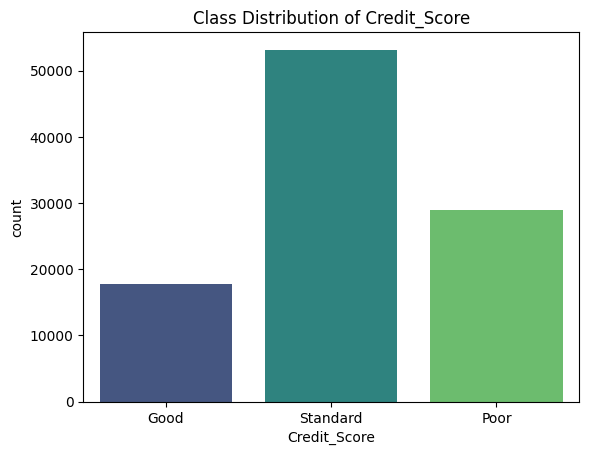

In [13]:
sns.countplot(x='Credit_Score', data=train_cs, palette='viridis')
plt.title('Class Distribution of Credit_Score')
plt.show()

Looking at the output of `train_cs['Credit_Score'].value_counts()`:

* **Standard**: 53,174 instances (approx 53%)
* **Poor**: 28,998 instances (29%)
* **Good**: 17,828 instances (17%)

This distribution indicates that the target variable `Credit_Score` is imbalanced because the classes are not evenly distributed. Here's why:

1. Imbalance Ratio:

  * The majority class (`Standard`) has **53%** of the total data.
  * The minority class (`Good`) has only **17.8%**, which is significantly smaller than the other classes.

2. Why Class Imbalance Matters:

  * Imbalanced classes can cause models to become biased toward the majority class (`Standard`) and perform poorly on the minority classes (`Poor` and `Good`).
  * Metrics like accuracy can become misleading because predicting only the majority class could still result in a high accuracy score.

Text(0.5, 1.0, 'Credit Score Pie Chart')

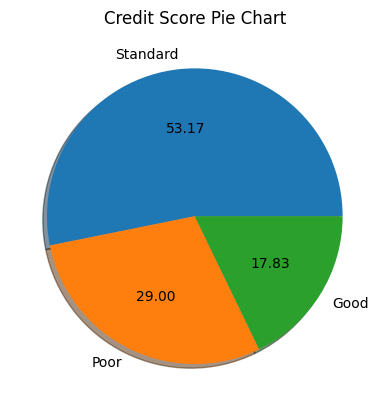

In [14]:
plt.pie(train_cs['Credit_Score'].value_counts(), autopct = '%.2f', shadow = True, labels = train_cs['Credit_Score'].value_counts().index)
plt.title('Credit Score Pie Chart')

 We'll handle imbalanced data during the feature engineering step. There are several techniques to address this, such as:
 * Resampling Methods (SMOTE)
 * Ensemble Learning
 * Undersampling & Oversampling etc.



In [15]:
print(train_cs.isnull().mean()*100)

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64


In [16]:
print(test_cs.isnull().mean()*100)

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       14.996
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       6.996
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.070
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.542
Payment_Behaviour            0.000
Monthly_Balance              1.124
dtype: float64


In [17]:
train_columns = train_cs.columns

train_less_than_five = [col for col in train_columns if ((train_cs[col].isnull().mean()*100) > 0) & ((train_cs[col].isnull().mean()*100) < 5)]
train_less_than_five

['Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

In [18]:
test_columns = test_cs.columns

test_less_than_five = [col for col in test_columns if ((test_cs[col].isnull().mean()*100) > 0) & ((test_cs[col].isnull().mean()*100) < 5)]
test_less_than_five

['Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

 Successfully identified the same columns with less than 5% missing values in both the train and test datasets. Since these columns are consistent across both datasets, we can proceed with handling these missing values in a uniform way

In [19]:
train_cs[train_less_than_five].sample(10)

,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance
50235,12.0,155.6240433223978,490.6721434799834
33708,0.0,268.87756352261937,588.0855554455609
76899,2.0,329.3095034676897,154.09319815214246
32743,12.0,123.33376600688436,329.66527757209417
68851,2.0,245.59382467955731,217.84556969389573
4462,4.0,223.71844025437161,254.85180408113152
30348,4.0,269.8503851640154,326.1383361376035
79516,5.0,77.23872883884523,515.9941878278214
48810,5.0,159.33237934612438,258.88589486914543
50077,11.0,10.11661404301702,252.67859852138656


In [20]:
len(train_cs[train_less_than_five].dropna()) / len(train_cs)

0.92517

In [21]:
len(test_cs[test_less_than_five].dropna()) / len(test_cs)

0.92432

Approx 92% data will remain if we drop the rows containing Null Values

### **CCA: (Complete Case Analysis)**

Checking whether removing the Null Values will affect the data and the distribution or not

In [22]:
new_df_train = train_cs[test_less_than_five].dropna()
new_df_test = test_cs[test_less_than_five].dropna()

In [23]:
print((train_cs.shape), (new_df_train.shape))
print((test_cs.shape), (new_df_test.shape))

(100000, 24) (92517, 3)
(50000, 23) (46216, 3)


In [24]:
columns_to_plot = ['Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']

In [25]:
print(train_cs[columns_to_plot].dtypes)
print(new_df_train[columns_to_plot].dtypes)

Num_Credit_Inquiries       float64
Amount_invested_monthly     object
Monthly_Balance             object
dtype: object
Num_Credit_Inquiries       float64
Amount_invested_monthly     object
Monthly_Balance             object
dtype: object


In [26]:
for col in columns_to_plot:
    train_cs[col] = pd.to_numeric(train_cs[col], errors='coerce')
    new_df_train[col] = pd.to_numeric(new_df_train[col], errors='coerce')

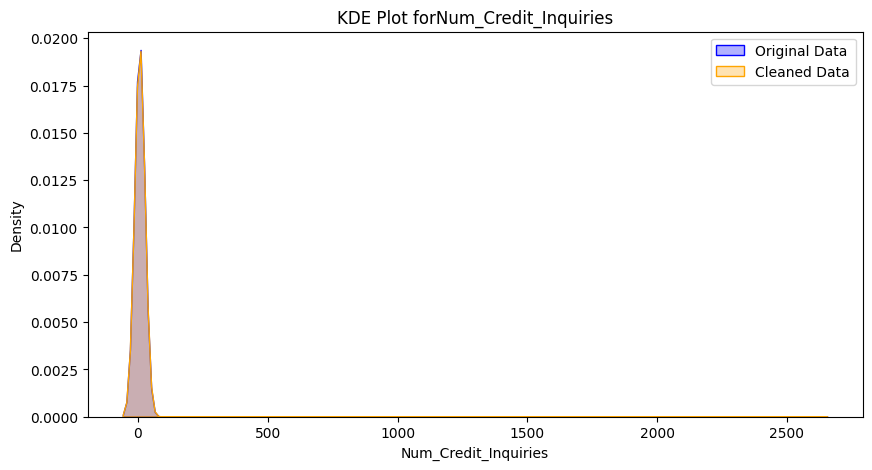

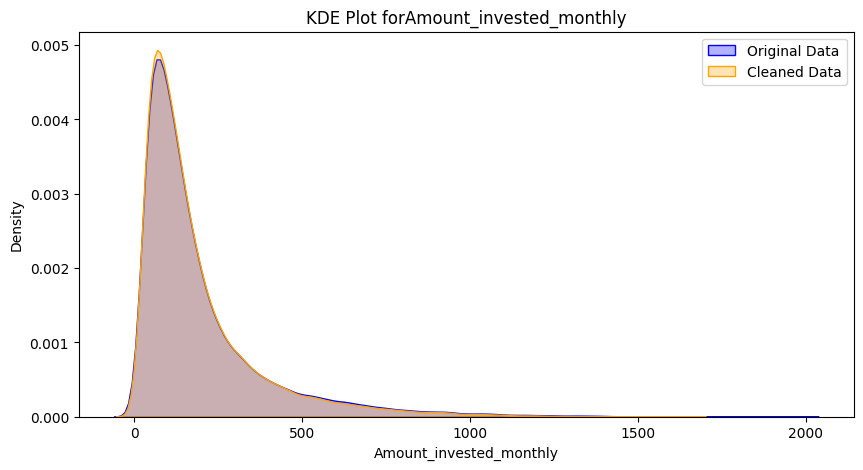

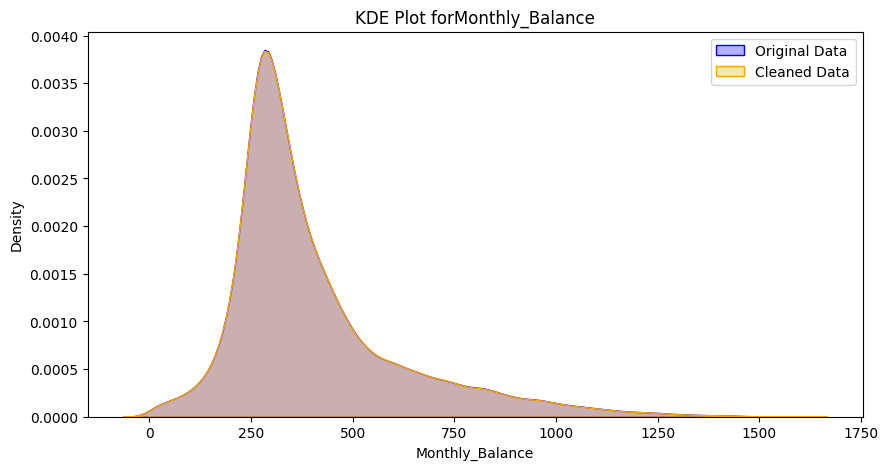

In [27]:
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))

    sns.kdeplot(train_cs[col], label='Original Data', color='blue', fill=True, alpha=0.3)

    sns.kdeplot(new_df_train[col], label='Cleaned Data', color='orange', fill=True, alpha=0.3)

    plt.title('KDE Plot for' + col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


* Removing rows with missing values in columns where the percentage of missing values is less than 5%, it typically has a minimal impact on the dataset, assuming the missing data is random and not biased toward any specific class or pattern.

* Confirmed the KDE plots are similar, removing these null values is unlikely to impact your results negatively.

In [28]:
print(test_cs[columns_to_plot].dtypes)
print(new_df_test[columns_to_plot].dtypes)

Num_Credit_Inquiries       float64
Amount_invested_monthly     object
Monthly_Balance             object
dtype: object
Num_Credit_Inquiries       float64
Amount_invested_monthly     object
Monthly_Balance             object
dtype: object


In [29]:
for col in columns_to_plot:
  test_cs[col] = pd.to_numeric(test_cs[col], errors = 'coerce')
  new_df_test[col] = pd.to_numeric(new_df_test[col], errors = 'coerce')

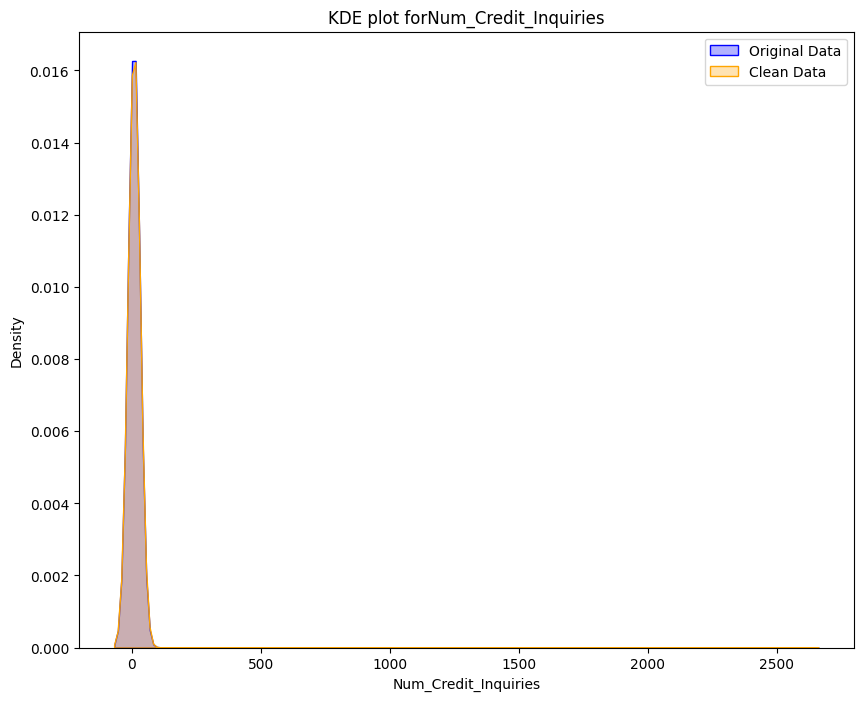

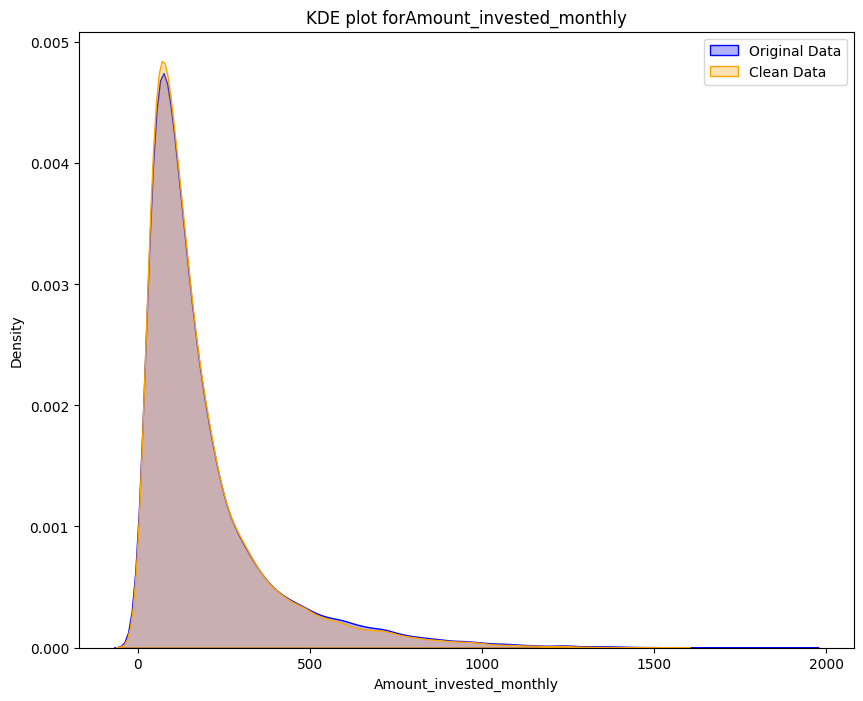

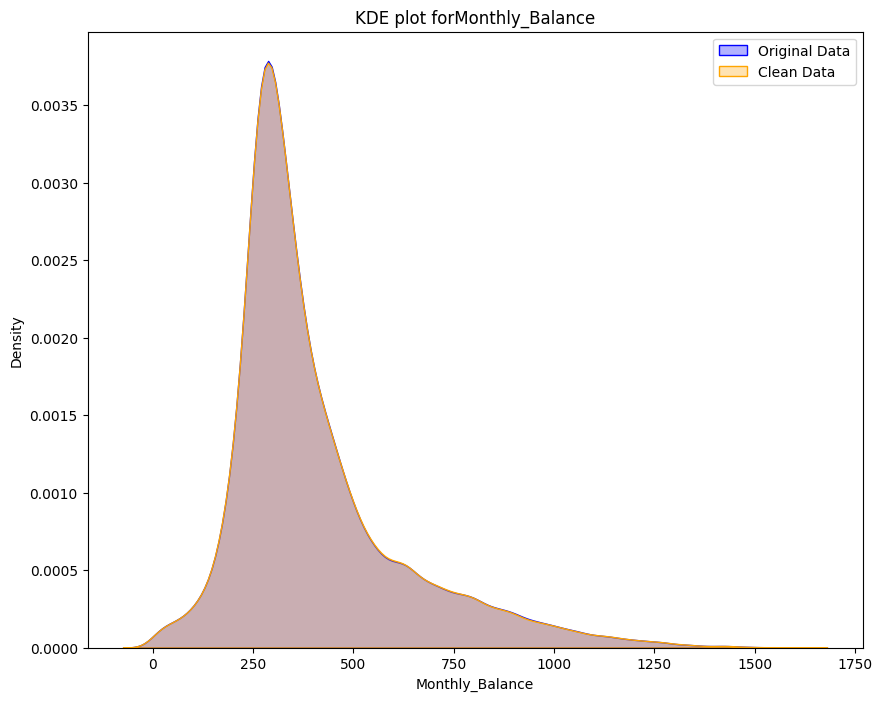

In [30]:
for col in columns_to_plot:
  plt.figure(figsize = (10,8))

  sns.kdeplot(test_cs[col], label = 'Original Data', color = 'blue', fill = True, alpha = 0.3)

  sns.kdeplot(new_df_test[col], label = 'Clean Data', color = 'orange', fill = True, alpha = 0.3)

  plt.title('KDE plot for' + col)
  plt.xlabel(col)
  plt.legend()
  plt.show()

* Therefore, Removing the Null Values from columns (`Num_Credit_Inquiries`, `Amount_invested_monthly`, `Monthly_Balance`), won't impact the data.

* And hence, the missing values were MCAR (Missing Completely At Random)

### Removing/Droping Null Values

In [31]:
train_cs = train_cs.dropna(subset = ['Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance'])
test_cs = test_cs.dropna(subset = ['Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance'])

In [32]:
print(train_cs.shape)
print(test_cs.shape)

(88356, 24)
(44111, 23)


In [33]:
print('Train Information:')
print(train_cs.info())

print('_'*90)
print('_'*90)

print('Test Information:')
print(test_cs.info())

Train Information:
<class 'pandas.core.frame.DataFrame'>
Index: 88356 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     88356 non-null  object 
 1   Age                       88356 non-null  object 
 2   Occupation                88356 non-null  object 
 3   Annual_Income             88356 non-null  object 
 4   Monthly_Inhand_Salary     75129 non-null  float64
 5   Num_Bank_Accounts         88356 non-null  int64  
 6   Num_Credit_Card           88356 non-null  int64  
 7   Interest_Rate             88356 non-null  int64  
 8   Num_of_Loan               88356 non-null  object 
 9   Type_of_Loan              78142 non-null  object 
 10  Delay_from_due_date       88356 non-null  int64  
 11  Num_of_Delayed_Payment    82157 non-null  object 
 12  Changed_Credit_Limit      88356 non-null  object 
 13  Num_Credit_Inquiries      88356 non-null  float

In [34]:
print(train_cs.isnull().mean()*100)

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       14.970121
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.560053
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.015936
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         0.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.036172
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      0.000000
Payment_Behaviour            0.000000
Monthly_Balance              0.000000
Credit_Score                 0.000000
dtype: float64


In [35]:
print(test_cs.isnull().mean()*100)

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       14.914647
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.573077
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       6.925710
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         0.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           8.938813
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      0.000000
Payment_Behaviour            0.000000
Monthly_Balance              0.000000
dtype: float64


### **Checking for Duplicate Values (train/test)**

In [36]:
train_cs.duplicated().sum()

0

In [37]:
test_cs.duplicated().sum()

0

In [38]:
train_cs.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [39]:
test_cs.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,December,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,September,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [40]:
train_cs.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,75129.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000
mean,4149.422311,17.005104,22.370286,72.649928,21.034621,27.611685,32.299368,1407.407967,187.550210,402.304896
std,3164.217466,117.258805,128.302993,467.361251,14.846641,192.898831,5.108643,8322.103231,182.818667,213.576688
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,0.000000,0.000000,0.095482
25%,1619.936667,3.000000,4.000000,8.000000,10.000000,3.000000,28.067096,29.921581,71.672831,270.066552
50%,3050.206667,6.000000,5.000000,13.000000,18.000000,6.000000,32.321080,68.142341,127.387884,336.673665
75%,5902.378333,7.000000,7.000000,20.000000,28.000000,9.000000,36.508921,155.779989,230.580836,469.630098
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,1646.388176,1576.288935


In [41]:
test_cs.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,37532.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000
mean,4147.946490,17.309560,23.190859,70.328739,20.984494,30.370044,32.311697,1507.683011,187.616062,403.108393
std,3159.821491,119.064774,130.536517,458.934981,14.833575,198.690634,5.099591,8664.571418,182.524576,213.775104
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.800587,0.000000,0.000000,0.103402
25%,1620.533542,3.000000,4.000000,7.000000,10.000000,4.000000,28.113969,31.910854,71.692081,270.539727
50%,3057.106250,6.000000,5.000000,13.000000,18.000000,7.000000,32.304656,73.973587,127.720759,337.134000
75%,5889.686875,7.000000,7.000000,20.000000,28.000000,10.000000,36.489503,171.998736,231.002818,470.860226
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000,1539.635702,1606.518192


### **Checking for Outliers**
**Numercial Columns**

In [42]:
num_columns = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',	'Interest_Rate', 'Delay_from_due_date',	'Num_Credit_Inquiries',	'Total_EMI_per_month', 'Amount_invested_monthly',	'Monthly_Balance']

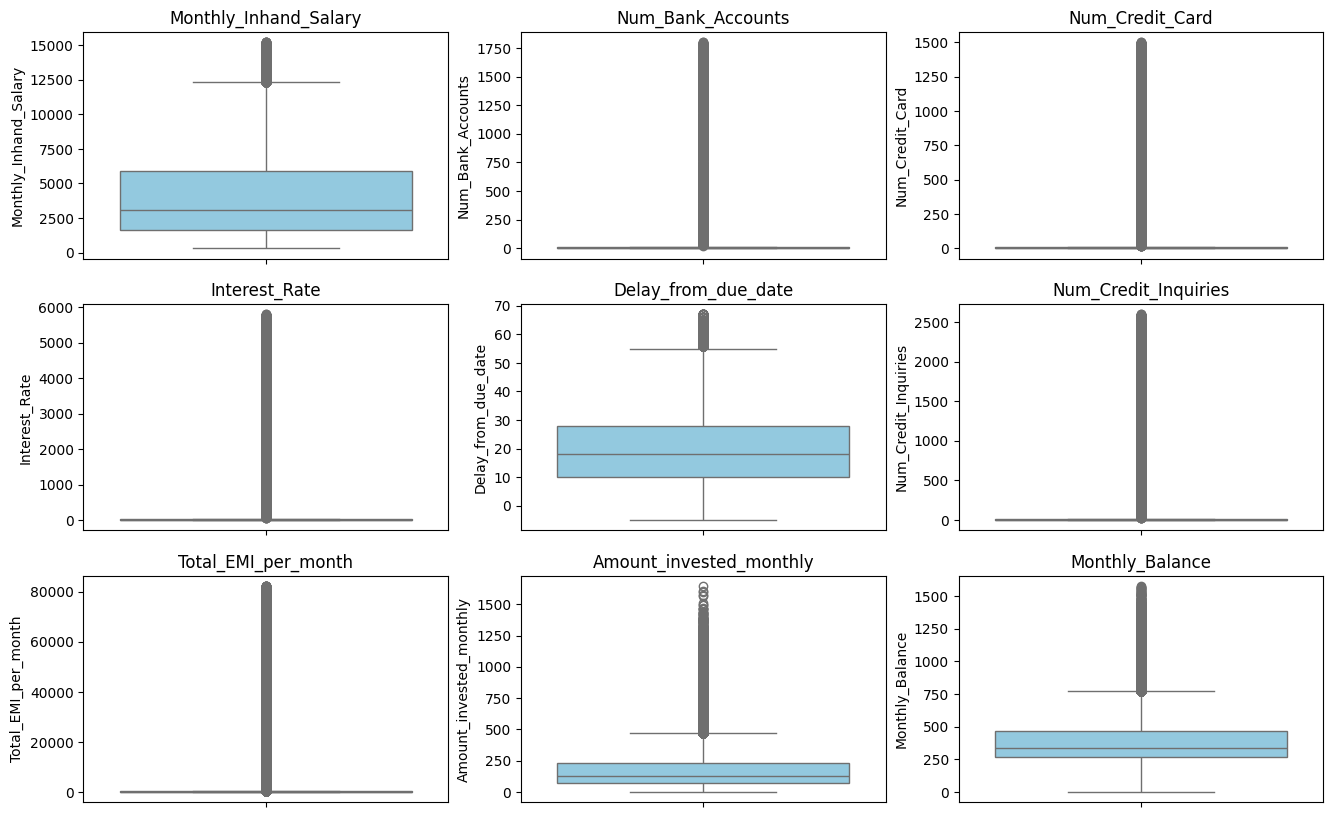

In [43]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_cs[col], color='skyblue')
    plt.title(col, fontsize=12)

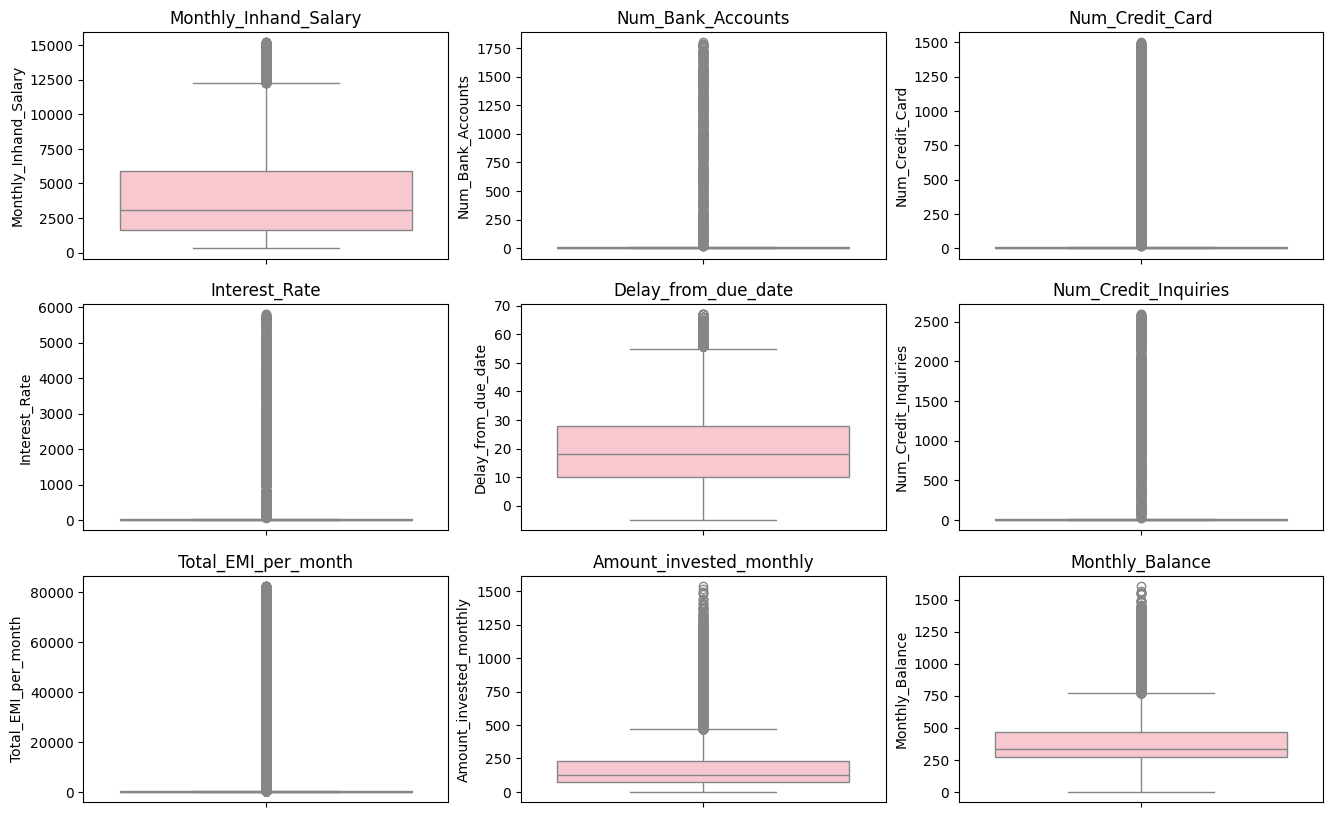

In [44]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=test_cs[col], color='pink')
    plt.title(col, fontsize=12)

### **Saving the preprocessed train and test dataset**

In [47]:
# # Save the preprocessed train dataset
train_cs.to_csv('preprocessed_train.csv', index = False)

# Save the preprocessed test dataset
test_cs.to_csv('preprocessed_test.csv', index=False)

print('Files saved successfully!')

Files saved successfully!
